# Heart Disease Prediction Analysis

## Introduction

Cardiovascular diseases, particularly heart disease, are one of the leading causes of mortality worldwide. Detecting heart disease early using medical and physiological factors is crucial for timely treatment. In this analysis, we explore the **Heart Disease dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease) to identify significant predictors of heart disease and build a machine learning model to predict the presence of heart disease based on various medical factors.

The dataset contains several medical attributes of patients, such as age, sex, cholesterol levels, and chest pain type. The target variable is the presence or absence of heart disease, labeled as `heart_disease` (1 = presence, 0 = absence). The goal of this analysis is to use machine learning techniques to determine which factors are most strongly associated with heart disease and build a predictive model.

## Data Source

- Dataset: [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+disease)
- Source: UCI Machine Learning Repository


# Exploratory Data Analysis (EDA)

## Introduction

Before diving into machine learning, it's essential to perform Exploratory Data Analysis (EDA) to understand the dataset's structure, identify patterns, and detect any potential issues such as missing values or outliers. EDA helps in forming hypotheses and preparing the data for further analysis.

In this section, we will explore the key characteristics of the Heart Disease dataset. We will:

1. **Check for Missing Values**: Ensure the dataset is complete without any missing values.
2. **Generate Descriptive Statistics**: Summarize the central tendency, dispersion, and shape of the dataset’s distribution.
3. **Correlation Analysis**: Examine the relationships between various features and the target variable (`heart_disease`).
4. **Visual Exploration**: Visualize key variables using boxplots and countplots to understand their distribution and association with heart disease.

### Missing Values Check

We begin by checking for missing values to ensure data integrity.

### Descriptive Statistics

Next, we calculate basic descriptive statistics such as mean, standard deviation, and percentiles for the numeric features in the dataset.

### Correlation Analysis

To understand the relationships between variables, we compute the correlation matrix and visualize it using a heatmap. This helps identify the features most strongly correlated with the target variable, `heart_disease`.

### Visual Exploration

We use visualizations such as:
- **Boxplots** to examine how numeric features like age, cholesterol, and max heart rate differ between patients with and without heart disease.
- **Countplots** to explore categorical features like chest pain type, exercise-induced angina, and number of vessels involved, highlighting their relationship with heart disease.


In [1]:
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns

# modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import shap


## Loading the Data

We will first load the dataset and take a preliminary look at its structure. The dataset is available in Excel format, and we'll use the pandas library to read the data.



In [2]:
data = pd.read_excel("./data/heart.xlsx")
#
print('The data have ', data.shape[0], ' rows and ', data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(data.columns)))

The data have  270  rows and  14  columns

column names: 

age_yr
sex_M_F
chest_pain_value
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
ECG_value
max_HR
exercise_angina
ST_depresssion_exercise
ST_slope_peak
number_vessels_involved
defect_diag
heart_disease


In [3]:
data.head()

,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Dataset Overview

The dataset consists of several medical and diagnostic features, as well as a target variable, `heart_disease`, which indicates the presence (1) or absence (0) of heart disease. Below is a description of the key features in the dataset:

- **age_yr**: Age in years
- **sex_M_F**: Gender (1 for male, 0 for female)
- **chest_pain_value**: Chest pain type (coded as 1 to 4)
- **resting_BP_mm_Hg**: Resting blood pressure in mm Hg
- **cholesterol_mg_dl**: Cholesterol level in mg/dL
- **fasting_blood_sugar_high**: Whether fasting blood sugar is > 120 mg/dL (1 = true, 0 = false)
- **ECG_value**: Resting electrocardiographic results (values range from 0 to 2)
- **max_HR**: Maximum heart rate achieved
- **exercise_angina**: Exercise-induced angina (1 = yes, 0 = no)
- **ST_depresssion_exercise**: ST depression induced by exercise
- **ST_slope_peak**: The slope of the peak exercise ST segment (1 to 3)
- **number_vessels_involved**: Number of major vessels (0 to 3) colored by fluoroscopy
- **defect_diag**: Thalassemia diagnostic (values coded as 3, 6, or 7)
- **heart_disease**: The target variable indicating heart disease (1 = presence, 0 = absence)


### Missing Values Check

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 age_yr                      0
sex_M_F                     0
chest_pain_value            0
resting_BP_mm_Hg            0
cholesterol_mg_dl           0
fasting_blood_sugar_high    0
ECG_value                   0
max_HR                      0
exercise_angina             0
ST_depresssion_exercise     0
ST_slope_peak               0
number_vessels_involved     0
defect_diag                 0
heart_disease               0
dtype: int64


## Descriptive Analysis

Descriptive statistics provide an overview of the central tendency, spread, and shape of the distribution of the dataset's numerical features. These statistics help in understanding the data better, by summarizing its key characteristics such as the mean, standard deviation, minimum, maximum, and various percentiles (25th, 50th, 75th).

In this step, we will compute descriptive statistics for the dataset's numeric columns to understand the spread and central values for each feature.


In [5]:
# Generate descriptive statistics for the numeric columns in the dataset
descriptive_stats = data.describe()

# Display the descriptive statistics
descriptive_stats


,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


## Data Distribution Visualization

We visualize the distribution of each feature in the dataset using histograms to better understand the spread of values and whether the variables are categorical or continuous. This helps identify the characteristics of each variable, which is important for selecting and preparing data for machine learning models.


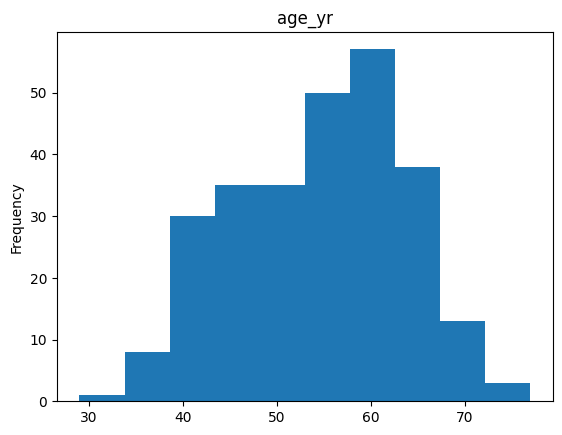

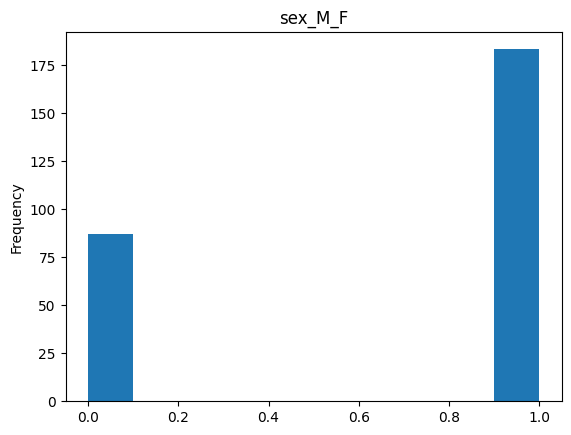

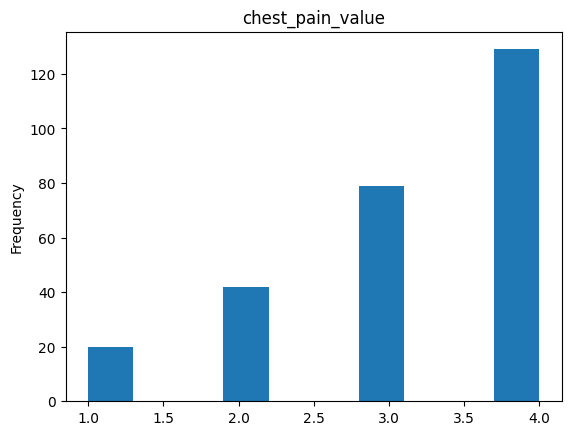

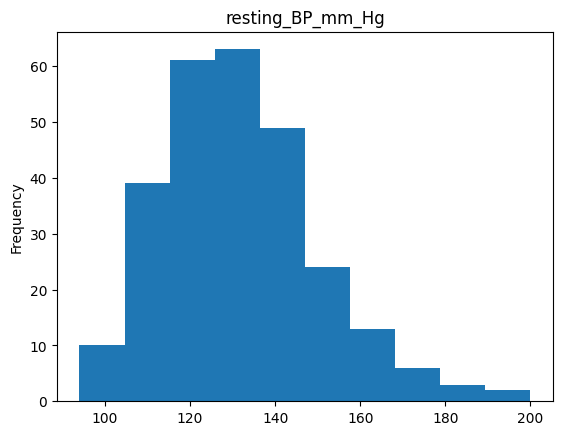

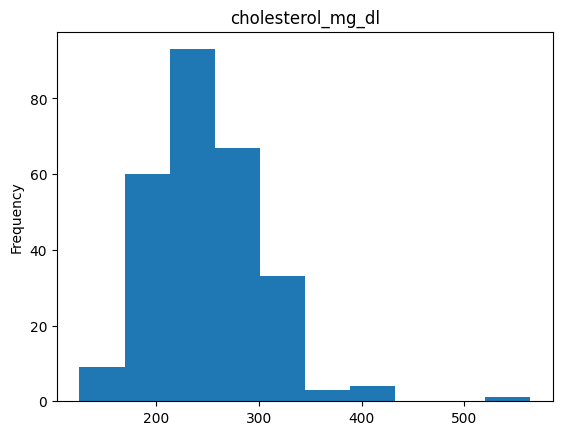

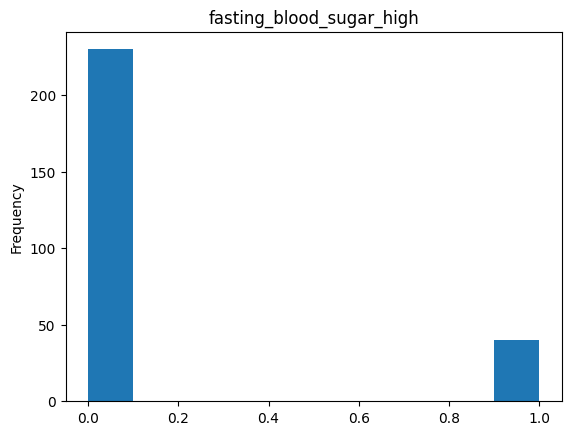

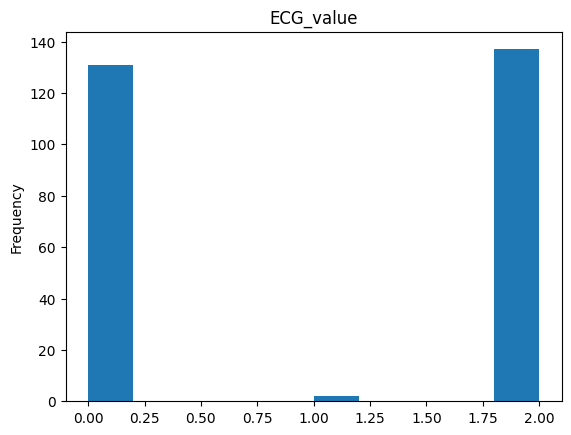

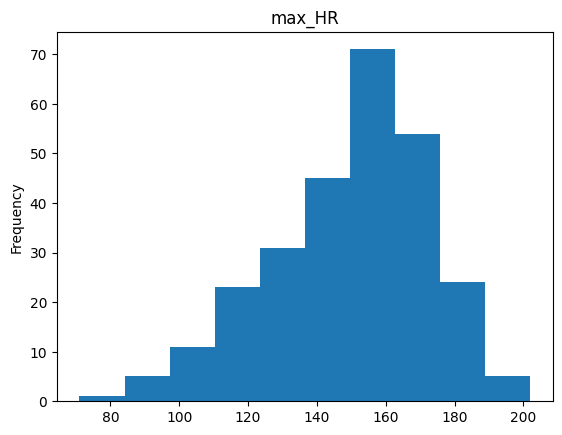

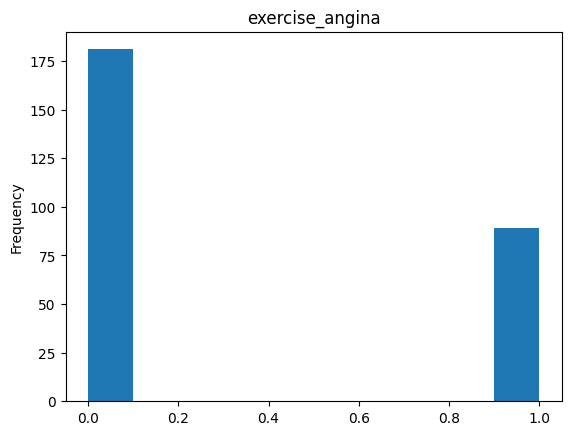

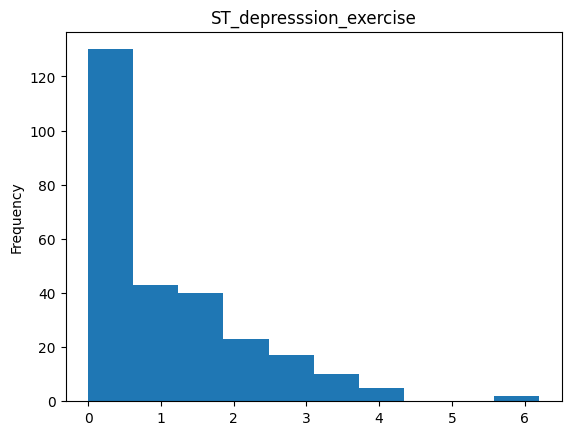

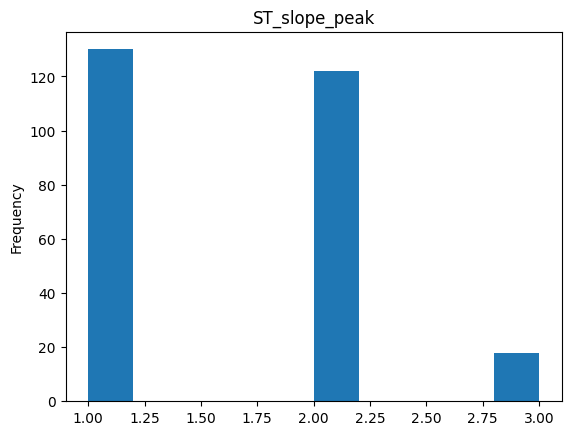

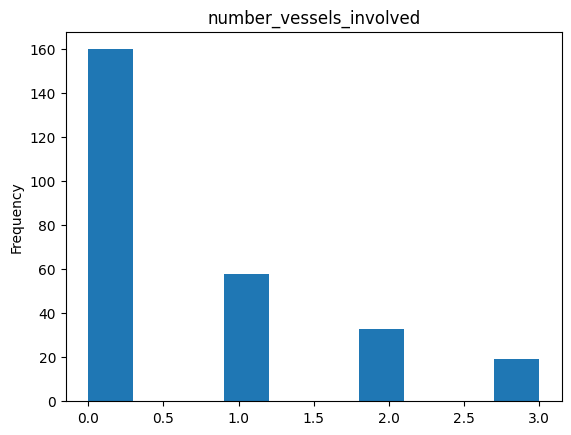

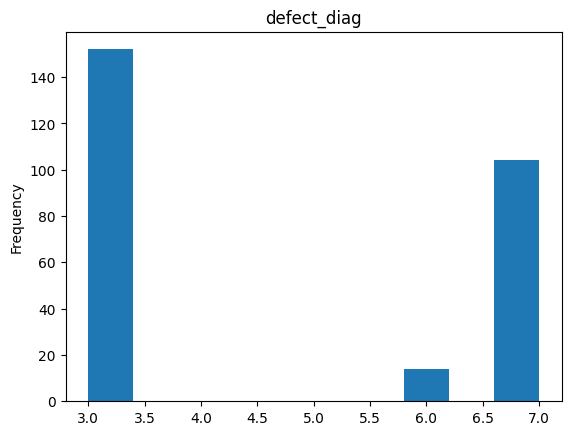

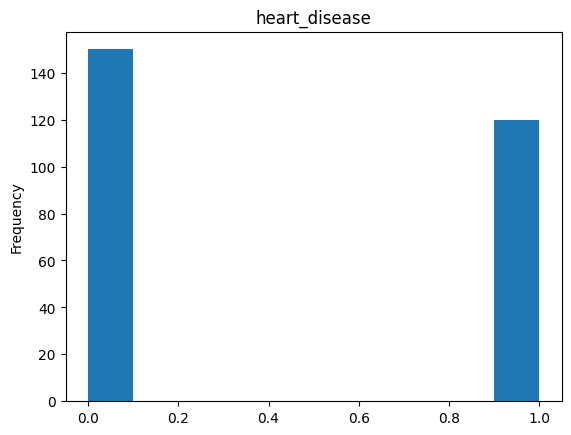

In [6]:
for col in list(data.columns):
    data[col].plot(kind = 'hist', title = col)
    plt.show()

From the histograms, we observe that some variables represent classes or categories (such as `sex_M_F`, `fasting_blood_sugar_high`), making them categorical. Other variables (such as `age_yr`, `resting_BP_mm_Hg`, `cholesterol_mg_dl`) are continuous and take on measured values, making them non-categorical.

Before applying machine learning models, it's essential to:

- Ensure that continuous variables are within sensible ranges (e.g., check for outliers like unusually high cholesterol levels).
- Scale continuous variables if needed, depending on the type of model being used.
- Properly encode categorical variables, as many machine learning models, such as logistic regression, require categorical variables to be transformed.

In this analysis, we will transform the categorical values for use in a logistic regression model, which will be addressed in later steps.


In [7]:
# extract the age as a Series, and inspect the values
#
x = data['age_yr']
print('first 6 lines of age data:\n', x.head(6))
print('\nsummary statistics of age:\n', x.describe())

first 6 lines of age data:
 0    70
1    67
2    57
3    64
4    74
5    65
Name: age_yr, dtype: int64

summary statistics of age:
 count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age_yr, dtype: float64


In [8]:
# do the same for the resting blood pressure
#
y = data['resting_BP_mm_Hg']
print('first six lines of blood pressure data:\n', y.head(6))
print('\nsummary statistics of blood pressure:\n', y.describe())

first six lines of blood pressure data:
 0    130
1    115
2    124
3    128
4    120
5    120
Name: resting_BP_mm_Hg, dtype: int64

summary statistics of blood pressure:
 count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_BP_mm_Hg, dtype: float64


Text(0.5, 1.0, 'Number of Vessels Involved vs Heart Disease')

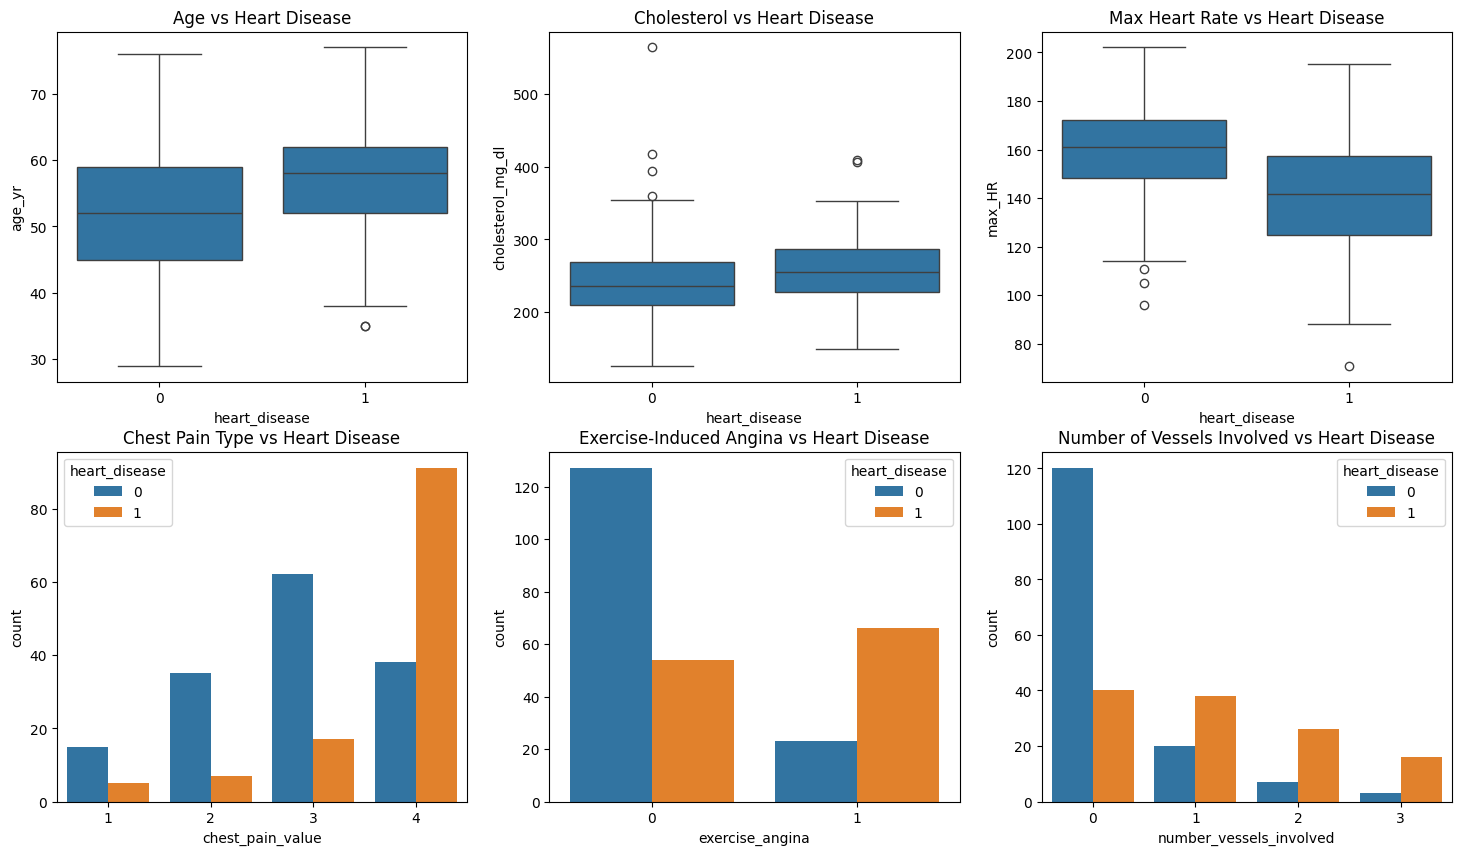

In [9]:
# Visualizing relationships between key features and the target variable (heart_disease)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age vs heart disease
sns.boxplot(x="heart_disease", y="age_yr", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Age vs Heart Disease")

# Cholesterol vs heart disease
sns.boxplot(x="heart_disease", y="cholesterol_mg_dl", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Cholesterol vs Heart Disease")

# Max Heart Rate vs heart disease
sns.boxplot(x="heart_disease", y="max_HR", data=data, ax=axes[0, 2])
axes[0, 2].set_title("Max Heart Rate vs Heart Disease")

# Chest Pain vs heart disease
sns.countplot(x="chest_pain_value", hue="heart_disease", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Chest Pain Type vs Heart Disease")

# Exercise Angina vs heart disease
sns.countplot(x="exercise_angina", hue="heart_disease", data=data, ax=axes[1, 1])
axes[1, 1].set_title("Exercise-Induced Angina vs Heart Disease")

# Number of vessels involved vs heart disease
sns.countplot(x="number_vessels_involved", hue="heart_disease", data=data, ax=axes[1, 2])
axes[1, 2].set_title("Number of Vessels Involved vs Heart Disease")

In [10]:
categorical_features = [ 'chest_pain_value', 'ECG_value', 'ST_slope_peak', 'defect_diag']


data = pd.get_dummies(data, columns = categorical_features, drop_first=True)
print('The data have ', data.shape[0], ' rows and ', data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(data.columns)))

The data have  270  rows and  19  columns

column names: 

age_yr
sex_M_F
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
max_HR
exercise_angina
ST_depresssion_exercise
number_vessels_involved
heart_disease
chest_pain_value_2
chest_pain_value_3
chest_pain_value_4
ECG_value_1
ECG_value_2
ST_slope_peak_2
ST_slope_peak_3
defect_diag_6
defect_diag_7


## Correlation Analysis

In this step, we will perform a correlation analysis to examine the relationships between the features and the target variable, `heart_disease`. The correlation matrix will help us understand which features have strong or weak correlations with heart disease, and can guide feature selection for our machine learning models.

Additionally, we will visualize the key relationships between several important features (such as `age_yr`, `cholesterol_mg_dl`, `max_HR`) and the target variable using boxplots and countplots. These visualizations will help us gain more insights into how specific features relate to the likelihood of heart disease.

### Correlation Matrix and Visualizations


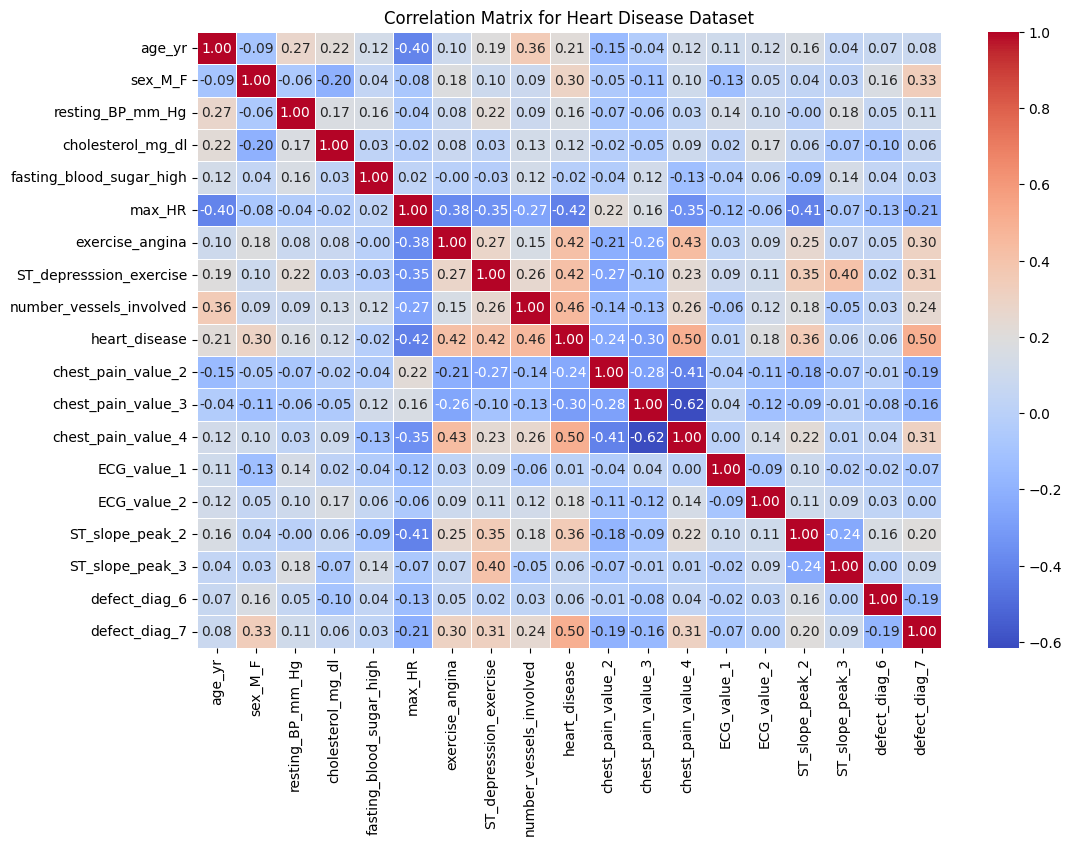

<Figure size 640x480 with 0 Axes>

In [13]:
# Correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Heart Disease Dataset")
plt.show()

# Save the figure to your local machine
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Checking for Multicollinearity using VIF

From the correlation matrix, we can observe that some variables are moderately or strongly correlated with each other. Here are a few notable correlations that suggest potential multicollinearity issues:

- **exercise_angina** is highly correlated with both `heart_disease` (0.42) and `defect_diag` (0.32).
- **number_vessels_involved** has a strong correlation with `heart_disease` (0.46) and `defect_diag` (0.25).
- **max_HR** is negatively correlated with both `heart_disease` (-0.42) and `exercise_angina` (-0.39).
- **ST_depression_exercise** is highly correlated with `ST_slope_peak` (0.61).

These correlations suggest that there may be multicollinearity among some features, which could affect the stability and interpretability of a regression model.

To address multicollinearity, several approaches can be considered:

- **Variance Inflation Factor (VIF)**: This method can be used to quantify how much a variable's variance is inflated due to collinearity with other predictors. A VIF value greater than 10 usually indicates significant multicollinearity.
- **Principal Component Analysis (PCA)**: PCA can be applied to reduce the dimensionality of the data by transforming the features into orthogonal components, which can mitigate multicollinearity.
- **Regularization techniques**: Applying regularization methods like Ridge or Lasso regression can help control for multicollinearity by adding a penalty for large coefficients, reducing the model's sensitivity to collinear variables.

In the next step, we will calculate the VIF for each feature to quantify multicollinearity in this dataset.

## Variance Inflation Factor (VIF) Results


In [16]:
# Remove the target variable and any non-numeric columns from the features
X = data.drop(columns=['heart_disease'])

# Ensure all columns are numeric
X = X.select_dtypes(include=[np.number])

# Add a constant column for the intercept term required by statsmodels
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                    Feature         VIF
0                    age_yr    1.487714
1                   sex_M_F    1.115220
2          resting_BP_mm_Hg    1.186214
3         cholesterol_mg_dl    1.129817
4  fasting_blood_sugar_high    1.058595
5                    max_HR    1.522498
6           exercise_angina    1.259337
7   ST_depresssion_exercise    1.273689
8   number_vessels_involved    1.242208
9                 Intercept  191.081588



- All the individual features have VIF values well below 10, which indicates that **multicollinearity is not a significant problem** in the dataset.
- The intercept has a very high VIF value (191.08), which is expected because the intercept is meant to capture the constant term in the model. This value can be ignored as it's not a predictor variable, and high VIF for the intercept is typical and not a concern.

### Interpretation:
- **VIF < 5**: Typically, a VIF below 5 is considered acceptable, meaning there is no strong multicollinearity. All features here have VIF values below 5, indicating that multicollinearity is not a significant issue.
- **Highest VIF (max_HR at 1.52)**: Even the highest VIF value (`max_HR` with 1.52) is quite low, reinforcing that there is no concern with multicollinearity among the predictors.

### Next Steps:
- Based on these results, no immediate action is needed to address multicollinearity.
- We can proceed with building the machine learning model without needing to remove or transform any of the features due to multicollinearity.


## Feature Importance with Random Forest

In this step, we will use the **Random Forest Classifier** to identify the most important features contributing to the prediction of heart disease. Random Forest is an ensemble learning method that constructs multiple decision trees and averages their predictions for better accuracy and stability. It is also useful for ranking feature importance by evaluating the contribution of each feature in predicting the target variable.

We will follow these steps:
1. Split the dataset into features (`X`) and the target (`y`).
2. Split the data into training and testing sets.
3. Train the Random Forest model on the training data.
4. Extract and display the feature importance based on the Random Forest model.
5. Evaluate the model on the test data and report the accuracy.

The resulting feature importance ranking will guide us in selecting the most significant features for further model building and interpretation.


In [21]:


# Split the dataset into features (X) and target (y)
X = data.drop(columns=['heart_disease'])
# Ensure all columns are numeric
X = X.select_dtypes(include=[np.number])
y = data['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)

# Test the model and print accuracy
y_pred = rf_model.predict(X_test)
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred))


                    Feature  Importance
7   ST_depresssion_exercise    0.227385
5                    max_HR    0.152926
8   number_vessels_involved    0.123830
0                    age_yr    0.120345
2          resting_BP_mm_Hg    0.114637
3         cholesterol_mg_dl    0.106975
6           exercise_angina    0.103578
1                   sex_M_F    0.039364
4  fasting_blood_sugar_high    0.010961
Random Forest Accuracy:  0.7407407407407407


## Building a Logistic Regression Model

Now that we have identified the most important features using the Random Forest model, we will proceed to build a **Logistic Regression** model using only those top features. Logistic Regression is a linear model commonly used for binary classification problems, such as predicting the presence or absence of heart disease.

Since logistic regression can be sensitive to the scale of the input features, we will use a **pipeline** that includes a **StandardScaler** to standardize the features (so they have mean 0 and standard deviation 1), followed by the Logistic Regression model. This ensures that all features are on the same scale, which is important for gradient-based optimization methods used in Logistic Regression.

The steps involved in this code:
1. Build a pipeline with scaling and logistic regression.
2. Use only the top 5 features (based on Random Forest importance) to train the model.
3. Train the model on the training data and make predictions on the test data.
4. Evaluate the model's performance by calculating the accuracy on the test set.


In [34]:
# Build a pipeline with scaling and logistic regression
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the Logistic Regression model using the most important features from Random Forest
important_features = feature_importance['Feature'].head(5).values  # Select top 5 features
X_train_top = X_train[important_features]
X_test_top = X_test[important_features]

logistic_model.fit(X_train_top, y_train)

# Predict on the test set and evaluate the model
y_pred_logistic = logistic_model.predict(X_test_top)
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred_logistic))


Logistic Regression Accuracy:  0.7777777777777778


#### Model Accuracy

The **Logistic Regression** model achieved an accuracy of **77.78%** on the test set. This indicates that the model correctly predicted whether a patient has heart disease in approximately 78% of cases.

While this is a good starting point, there may be room for improvement. 

## SHAP Model Interpretability

In this step, we use the SHAP (SHapley Additive exPlanations) framework to interpret the Logistic Regression model's predictions. SHAP provides insights into how much each feature contributes to the prediction of the target variable for both individual and global explanations.




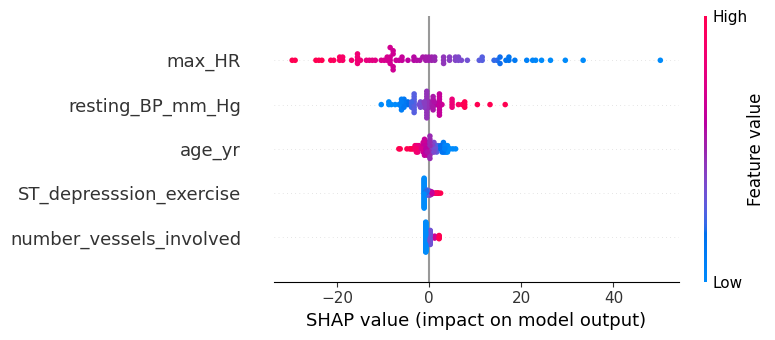

In [43]:


# Create a SHAP explainer for the Logistic Regression model (not the whole pipeline)
explainer = shap.Explainer(logistic_model.named_steps['logisticregression'], X_train_top)

# Calculate SHAP values for the test data
shap_values = explainer(X_test_top)

# Visualize SHAP summary plot for feature importance
shap.summary_plot(shap_values.values, X_test_top, feature_names=X_test_top.columns)





## Interpretation of SHAP Summary Plot

The SHAP summary plot visualizes the impact of the most important features on the model's output for predicting heart disease. The x-axis represents the SHAP values, which indicate the contribution of each feature to the prediction. The SHAP value reflects how much a particular feature is increasing or decreasing the likelihood of predicting heart disease.

### Key Observations:
1. **max_HR**: This feature has the highest impact on the model's output. Higher values (shown in pink) increase the SHAP values, pushing the prediction towards heart disease, while lower values (blue) decrease the likelihood of heart disease.
2. **resting_BP_mm_Hg**: This feature shows a moderate impact. Higher values of resting blood pressure (in pink) seem to slightly increase the prediction towards heart disease.
3. **age_yr**: Older age is associated with a higher likelihood of predicting heart disease (shown by the spread of pink points with positive SHAP values). Younger individuals (in blue) tend to lower the prediction.
4. **ST_depression_exercise**: This feature shows a positive correlation with heart disease. Higher values lead to an increase in heart disease predictions.
5. **number_vessels_involved**: The number of vessels involved shows a clear trend, with higher values (in pink) increasing the SHAP value, thus contributing to a higher likelihood of heart disease prediction.

### Color Interpretation:
- **Red/Pink**: Indicates high feature values, and their impact on pushing the prediction higher (towards a positive outcome, i.e., predicting heart disease).
- **Blue**: Indicates low feature values, and their negative impact on the model’s prediction (i.e., reducing the likelihood of predicting heart disease).

The plot shows that the features with the largest impacts on heart disease predictions are `max_HR`, `resting_BP_mm_Hg`, and `age_yr`, among others. These features are crucial to consider when interpreting how the model arrives at its predictions.

### SHAP Force Plot Interpretation (Single Case)


In [39]:
# Explain a single prediction using the force plot
true_value = y_test.iloc[0]  # Get the true label for the first instance
print(f"True label for the first instance: {true_value}")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test_top.iloc[0], feature_names=X_test_top.columns)


True label for the first instance: 1




- **Prediction (f(x) = -76.98)**: The model's output is -76.98, which is below the base value of -73.98, suggesting a lower likelihood of heart disease for this individual.
  
- **Key Factors**:
  - **number_vessels_involved = 1**: This feature pushes the prediction higher (increases the likelihood of heart disease).
  - **resting_BP_mm_Hg = 128**, **ST_depresssion_exercise = 0.4**, **max_HR = 150**, and **age_yr = 57**: These features push the prediction lower, decreasing the likelihood of heart disease.

Overall, the features lead to a lower predicted likelihood of heart disease for this individual.

### SHAP Force Plot Interpretation (Second Case)


In [41]:
true_value = y_test.iloc[1]  # Get the true label for the first instance
print(f"True label for the first instance: {true_value}")
shap.force_plot(explainer.expected_value, shap_values.values[1], X_test_top.iloc[1], feature_names=X_test_top.columns)


True label for the first instance: 1




- **True Label: 1**: This individual is labeled as having heart disease.
- **Prediction (f(x) = -72.69)**: The model's prediction is slightly lower than the base value of -73.98, indicating a lower likelihood of heart disease compared to the baseline.

- **Key Factors**:
  - **age_yr = 46** and **max_HR = 144**: These features push the prediction higher (increasing the likelihood of heart disease).
  - **resting_BP_mm_Hg = 120**, **number_vessels_involved = 0**, and **ST_depresssion_exercise**: These features push the prediction lower (decreasing the likelihood of heart disease).

Overall, while some factors (e.g., age and heart rate) increase the likelihood of heart disease, other factors (e.g., blood pressure and number of vessels involved) reduce the likelihood, leading to a predicted value close to the baseline.

### SHAP Force Plot Interpretation (Third Case)



In [44]:
true_value = y_test.iloc[2]  # Get the true label for the first instance
print(f"True label for the first instance: {true_value}")
shap.force_plot(explainer.expected_value, shap_values.values[2], X_test_top.iloc[2], feature_names=X_test_top.columns)

True label for the first instance: 0



- **True Label: 0**: This individual is labeled as not having heart disease.
- **Prediction (f(x) = -97.54)**: The model’s predicted output is significantly lower than the base value of -73.98, indicating a very low likelihood of heart disease.

- **Key Factors**:
  - **max_HR = 178**: This high heart rate strongly reduces the likelihood of heart disease, pushing the prediction lower.
  - **resting_BP_mm_Hg = 120** and **number_vessels_involved = 0**: These features further decrease the likelihood of heart disease.

Overall, all the contributing features push the prediction towards a much lower value, which aligns with the true label of no heart disease.
